# Data Exploration

- TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.
- VisitNumber - an id corresponding to a single trip by a single customer
- Weekday - the weekday of the trip
- Upc - the UPC number of the product purchased
- ScanCount - the number of the given item that was purchased. A negative value indicates a product return.
- DepartmentDescription - a high-level description of the item's department
- FinelineNumber - a more refined category for each of the products, created by Walmart

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv('/Users/maxweber/Kaggle/walmart-recruiting-trip-type-classification/train.csv',
                   dtype = {'Upc': str, 'FinelineNumber': str})
df

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000
1,30,7,Friday,60538815980,1,SHOES,8931
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017
...,...,...,...,...,...,...,...
647049,39,191346,Sunday,32390001778,1,PHARMACY OTC,1118
647050,39,191346,Sunday,7874205336,1,FROZEN FOODS,1752
647051,39,191346,Sunday,4072,1,PRODUCE,4170
647052,8,191347,Sunday,4190007664,1,DAIRY,1512


## Data Cleaning

In [3]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.shape # from 647,054 to 638,472 rows

(638472, 7)

 ## Some quick Visualizations

<AxesSubplot:xlabel='count', ylabel='TripType'>

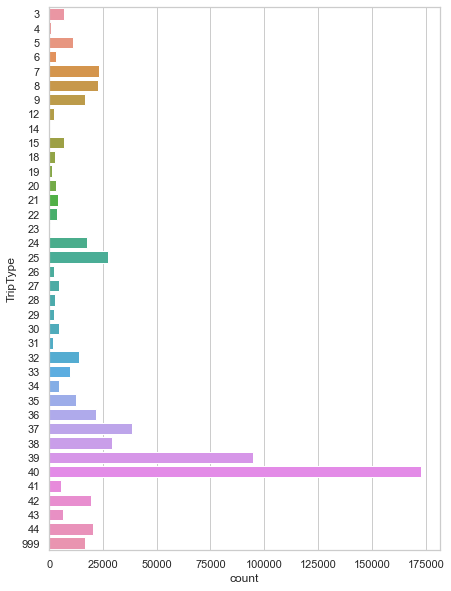

In [5]:
# Labeled Data: TripType
sns.set(style='whitegrid', palette="colorblind", rc={"figure.figsize": [7,10]})
len(df['TripType'].unique()) # 38 classes
sns.countplot(y = 'TripType', data = df)

In [7]:
#VisitNumber
df['VisitNumber'].value_counts().describe() #average Visit: 6-7 items, max: 195 items (post cleaning&grouping)
len(df['VisitNumber'].unique()) #93086

94247

<AxesSubplot:xlabel='Weekday'>

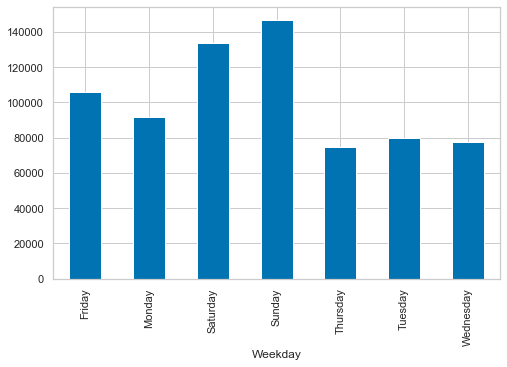

In [10]:
# Weekday
#sns.displot(df['Weekday'], height = 6, aspect = 1.6, alpha = 1)
df.groupby('Weekday')['ScanCount'].sum().plot.bar(figsize = (8,5))

In [11]:
#UPC
df['Upc'].value_counts().describe()
#97714 unique

count    97714.000000
mean         6.534089
std         35.835548
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       7644.000000
Name: Upc, dtype: float64

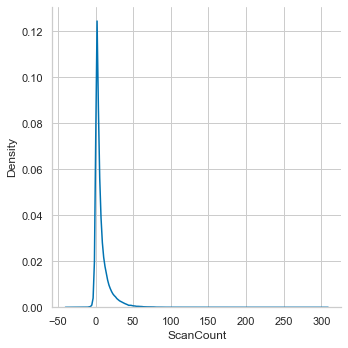

In [12]:
# ScanCount
sns.displot(df.groupby('VisitNumber')['ScanCount'].sum(), kind = 'kde')

<AxesSubplot:xlabel='count', ylabel='DepartmentDescription'>

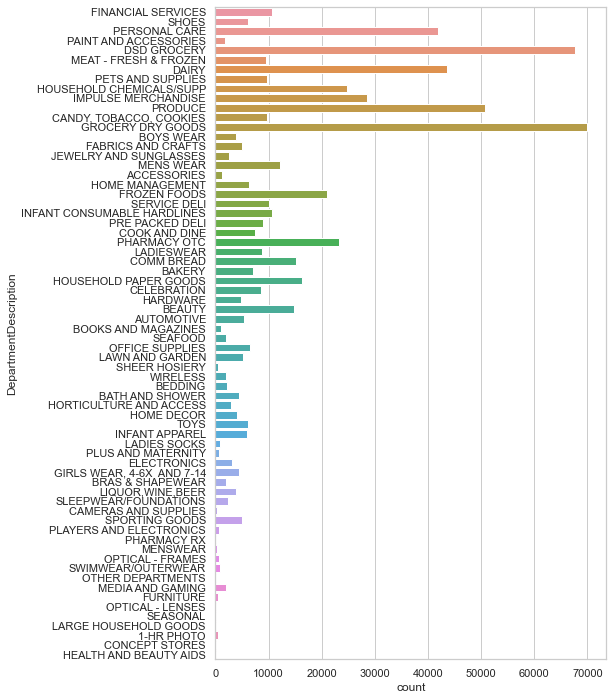

In [16]:
# DepartmentDescription
sns.set(style='whitegrid', palette="colorblind", rc={"figure.figsize": [7,12]})
df['DepartmentDescription'].value_counts()
#df.groupby('DepartmentDescription')['ScanCount'].sum()
sns.countplot(data = df,y = df['DepartmentDescription'])

<AxesSubplot:title={'center':'FinlineNumbers per Department'}, xlabel='DepartmentDescription'>

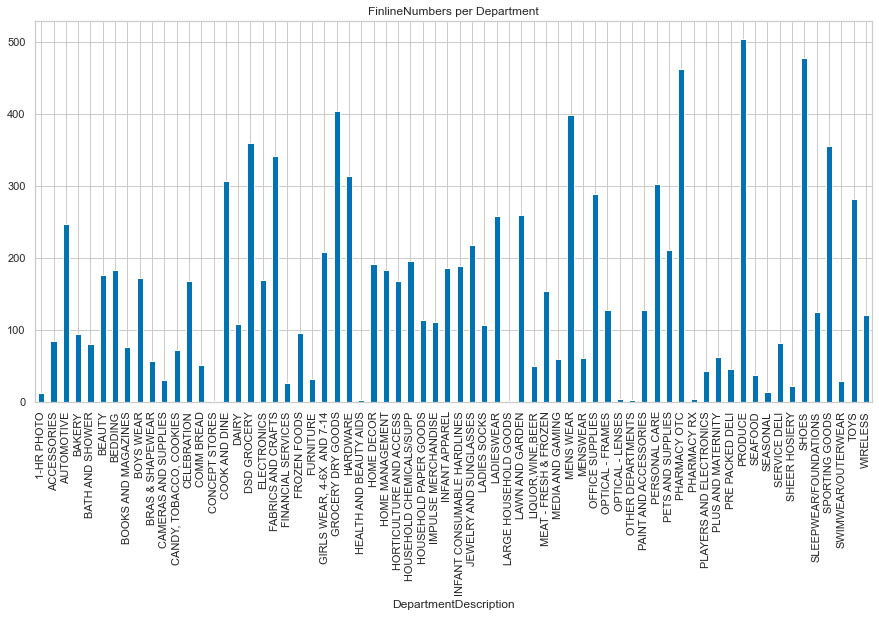

In [18]:
# FinelineNumber
len(df['FinelineNumber'].unique()) #5188
fineline_per_department = df[['DepartmentDescription','FinelineNumber']] # 638472 rows
fineline_per_department = fineline_per_department.drop_duplicates() # 10488 rows
fineline_per_department = fineline_per_department.groupby('DepartmentDescription')['FinelineNumber'].count()

fineline_per_department.plot.bar(figsize = (15,7), title = 'FinlineNumbers per Department')

### Features 
Group by VisitNumber
For each visit, you must submit a set of predicted probabilities.
Group by *VisitNumber* and visualize the visit data

In [19]:
# 1st step: group by UPC and sum the Scan Count. This way immediatly returned items are gone after dropping ScanCount == 0
print('rows before: ', df.shape[0])
df = df.groupby(['Upc', 'TripType', 'VisitNumber', 'Weekday',
            'DepartmentDescription', 'FinelineNumber'])['ScanCount'].sum().reset_index()
df = df.loc[df['ScanCount'] != 0]
print('rows after: ', df.shape[0])
# -15,003 rows

rows before:  638472
rows after:  623469


In [141]:
# 2nd step: create features for VisitNumber 
# Counts for each Department (and FineLine Number?); maybe count of Departments/Finelinenumebrs in the Visit?
# Sum ScanCount also sth like average ScanCount? 
# How use UPC? count of upcs? dimensionality problem if we use dummies for all UPCs ?
# Weekday (as Number?)
